In [3]:
import pandas as pd
import time
import numpy as np
import gc

In [4]:
train= pd.read_csv('train_day_7.csv',parse_dates=['click_time'],nrows=10000000)

In [5]:
print(train.shape)
train.head()

(10000000, 12)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,0,0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,0,0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,0,0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,0,0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,0,0


## Creat Features

###  1. Combination counting

In [6]:
print('grouping by ip-hour combination...')
gp = train[['ip','hour','channel']].groupby(by=['ip','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_tcount'})
train= train.merge(gp, on=['ip','hour'], how='left')
del gp
gc.collect()

grouping by ip-hour combination...


58

In [7]:
print('grouping by ip-app combination...')
gp = train[['ip', 'app', 'channel']].groupby(by=['ip', 'app'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_app_count'})
train= train.merge(gp, on=['ip','app'], how='left')
del gp
gc.collect()

grouping by ip-app combination...


92

In [8]:
print('grouping by ip-app-os combination...')
gp = train[['ip','app', 'os', 'channel']].groupby(by=['ip', 'app', 'os'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_app_os_count'})
train = train.merge(gp, on=['ip','app', 'os'], how='left')
del gp
gc.collect()

grouping by ip-app-os combination...


108

### 2. Adding features with var and mean hour

In [9]:
print('grouping by : ip_chl_var_hour')
gp = train[['ip','hour','channel']].groupby(by=['ip','channel'])[['hour']].var().reset_index().rename(index=str, columns={'hour': 'ip_h_chan_var'})
train = train.merge(gp, on=['ip','channel'], how='left')
del gp
gc.collect()

grouping by : ip_chl_var_hour


92

In [10]:
print('grouping by : ip_app_os_var_hour')
gp = train[['ip','app', 'os', 'hour']].groupby(by=['ip', 'app', 'os'])[['hour']].var().reset_index().rename(index=str, columns={'hour': 'ip_app_os_var'})
train = train.merge(gp, on=['ip','app', 'os'], how='left')
del gp
gc.collect()

grouping by : ip_app_os_var_hour


111

In [11]:
print('grouping by : ip_app_chl_mean_hour')
gp = train[['ip','app', 'channel','hour']].groupby(by=['ip', 'app', 'channel'])[['hour']].mean().reset_index().rename(index=str, columns={'hour': 'ip_app_channel_mean_hour'})
train = train.merge(gp, on=['ip','app', 'channel'], how='left')
del gp
gc.collect()

grouping by : ip_app_chl_mean_hour


111

In [12]:
print("vars and data type: ")
train.info()
train['ip_tcount'] = train['ip_tcount'].astype('uint16')
train['ip_app_count'] = train['ip_app_count'].astype('uint16')
train['ip_app_os_count'] = train['ip_app_os_count'].astype('uint16')


vars and data type: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 18 columns):
ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time                  datetime64[ns]
attributed_time             object
is_attributed               int64
day                         int64
hour                        int64
minute                      int64
second                      int64
ip_tcount                   int64
ip_app_count                int64
ip_app_os_count             int64
ip_h_chan_var               float64
ip_app_os_var               float64
ip_app_channel_mean_hour    float64
dtypes: datetime64[ns](1), float64(3), int64(13), object(1)
memory usage: 1.4+ GB


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 18 columns):
ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time                  datetime64[ns]
attributed_time             object
is_attributed               int64
day                         int64
hour                        int64
minute                      int64
second                      int64
ip_tcount                   uint16
ip_app_count                uint16
ip_app_os_count             uint16
ip_h_chan_var               float64
ip_app_os_var               float64
ip_app_channel_mean_hour    float64
dtypes: datetime64[ns](1), float64(3), int64(10), object(1), uint16(3)
memory usage: 1.2+ GB


### 3. Confidence Rates for is_attributed

In [14]:
print('grouping by : ip_att_rate')
gp = train[['ip', 'is_attributed']].groupby(by=['ip'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'ip_rate'})
train = train.merge(gp, on=['ip'], how='left')
del gp
gc.collect()

grouping by : ip_att_rate


234

In [15]:
print('grouping by : app_att_rate')
gp = train[['app', 'is_attributed']].groupby(by=['app'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'app_rate'})
train = train.merge(gp, on=['app'], how='left')
del gp
gc.collect()

grouping by : app_att_rate


82

In [16]:
print('grouping by : device_att_rate')
gp = train[['device', 'is_attributed']].groupby(by=['device'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'device_rate'})
train = train.merge(gp, on=['device'], how='left')
del gp
gc.collect()

grouping by : device_att_rate


82

In [17]:
print('grouping by : os_att_rate')
gp = train[['os', 'is_attributed']].groupby(by=['os'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'os_rate'})
train = train.merge(gp, on=['os'], how='left')
del gp
gc.collect()

grouping by : os_att_rate


82

In [18]:
print('grouping by : channel_att_rate')
gp = train[['channel', 'is_attributed']].groupby(by=['channel'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'channel_rate'})
train = train.merge(gp, on=['channel'], how='left')
del gp
gc.collect()

grouping by : channel_att_rate


82

In [19]:
print('grouping by : app_channel_att_rate')
gp = train[['app','channel', 'is_attributed']].groupby(by=['channel','app'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'app_channel_rate'})
train = train.merge(gp, on=['channel','app'], how='left')
del gp
gc.collect()

grouping by : app_channel_att_rate


98

In [20]:
print('grouping by : app_os_att_rate')
gp = train[['app','os', 'is_attributed']].groupby(by=['os','app'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'app_os_rate'})
train = train.merge(gp, on=['os','app'], how='left')
del gp
gc.collect()

grouping by : app_os_att_rate


98

In [21]:
print('grouping by : app_device_att_rate')
gp = train[['app','device', 'is_attributed']].groupby(by=['device','app'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'app_device_rate'})
train = train.merge(gp, on=['device','app'], how='left')
del gp
gc.collect()

grouping by : app_device_att_rate


98

In [22]:
print('grouping by : os_channel_att_rate')
gp = train[['os','channel', 'is_attributed']].groupby(by=['channel','os'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'os_channel_rate'})
train = train.merge(gp, on=['channel','os'], how='left')
del gp
gc.collect()

grouping by : os_channel_att_rate


98

In [23]:
print('grouping by : device_channel_att_rate')
gp = train[['device','channel', 'is_attributed']].groupby(by=['channel','device'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'device_channel_rate'})
train = train.merge(gp, on=['channel','device'], how='left')
del gp
gc.collect()

grouping by : device_channel_att_rate


98

In [24]:
print('grouping by : device_channel_att_rate')
gp = train[['device','os', 'is_attributed']].groupby(by=['os','device'])[['is_attributed']].mean().reset_index().rename(index=str, columns={'is_attributed': 'device_os_rate'})
train = train.merge(gp, on=['os','device'], how='left')
del gp
gc.collect()

grouping by : device_channel_att_rate


98

In [25]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,app_rate,device_rate,os_rate,channel_rate,app_channel_rate,app_os_rate,app_device_rate,os_channel_rate,device_channel_rate,device_os_rate
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,0.000299,0.002517,0.003789,0.000408,0.000408,0.000107,0.000308,0.000743,0.000416,0.003976
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,0.000209,0.002517,0.001949,0.000146,0.000133,0.000325,0.000208,0.000000,0.000147,0.001987
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.002602,0.000271,0.002845,0.002047,0.002173,0.003577,0.000074,0.002691,0.000081,0.000315
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,0.000299,0.002517,0.002845,0.000546,0.000204,0.000357,0.000308,0.000733,0.000565,0.002905
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,0.000258,0.002517,0.001227,0.000145,0.000170,0.000082,0.000266,0.000000,0.000150,0.001244


In [26]:
train['ip']=train['ip'].astype('uint32')
train['app']=train['app'].astype('uint16')
train['device']=train['device'].astype('uint16')
train['os']=train['os'].astype('uint16')
train['channel']=train['channel'].astype('uint16')
train['hour']=train['hour'].astype('uint8')
train['is_attributed']=train['is_attributed'].astype('uint8')
train['ip_tcount']=train['ip_tcount'].astype('uint16')
train['ip_app_count']=train['ip_app_count'].astype('uint16')
train['ip_app_os_count']=train['ip_app_os_count'].astype('uint16')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 29 columns):
ip                          uint32
app                         uint16
device                      uint16
os                          uint16
channel                     uint16
click_time                  datetime64[ns]
attributed_time             object
is_attributed               uint8
day                         int64
hour                        uint8
minute                      int64
second                      int64
ip_tcount                   uint16
ip_app_count                uint16
ip_app_os_count             uint16
ip_h_chan_var               float64
ip_app_os_var               float64
ip_app_channel_mean_hour    float64
ip_rate                     float64
app_rate                    float64
device_rate                 float64
os_rate                     float64
channel_rate                float64
app_channel_rate            float64
app_os_rate                 float6

## 4. How long the time till the next click

In [28]:
GROUP_BY_NEXT_CLICKS = [
    
    # V1
    {'groupby': ['ip']},
    {'groupby': ['ip', 'app']},
    {'groupby': ['ip', 'channel']},
    {'groupby': ['ip', 'os']}
]

# Calculate the time to next click for each group
for spec in GROUP_BY_NEXT_CLICKS:
    
    # Name of new feature
    new_feature = '{}_nextClick'.format('_'.join(spec['groupby']))    
    
    # Unique list of features to select
    all_features = spec['groupby'] + ['click_time']
    
    # Run calculation
    print(f">> Grouping by {spec['groupby']}, and saving time to next click in: {new_feature}")
    train[new_feature] = train[all_features].groupby(spec['groupby']).click_time.transform(lambda x: x.diff().shift(-1)).dt.seconds

train.head()

>> Grouping by ['ip'], and saving time to next click in: ip_nextClick
>> Grouping by ['ip', 'app'], and saving time to next click in: ip_app_nextClick
>> Grouping by ['ip', 'channel'], and saving time to next click in: ip_channel_nextClick
>> Grouping by ['ip', 'os'], and saving time to next click in: ip_os_nextClick


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,app_channel_rate,app_os_rate,app_device_rate,os_channel_rate,device_channel_rate,device_os_rate,ip_nextClick,ip_app_nextClick,ip_channel_nextClick,ip_os_nextClick
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,0.000408,0.000107,0.000308,0.000743,0.000416,0.003976,5.0,47.0,173.0,1708.0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,0.000133,0.000325,0.000208,0.000000,0.000147,0.001987,16.0,47.0,1487.0,16.0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.002173,0.003577,0.000074,0.002691,0.000081,0.000315,0.0,2.0,2.0,0.0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,0.000204,0.000357,0.000308,0.000733,0.000565,0.002905,12.0,478.0,501.0,5794.0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,0.000170,0.000082,0.000266,0.000000,0.000150,0.001244,7.0,609.0,930.0,1727.0


In [29]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,app_channel_rate,app_os_rate,app_device_rate,os_channel_rate,device_channel_rate,device_os_rate,ip_nextClick,ip_app_nextClick,ip_channel_nextClick,ip_os_nextClick
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,0.000408,0.000107,0.000308,0.000743,0.000416,0.003976,5.0,47.0,173.0,1708.0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,0.000133,0.000325,0.000208,0.000000,0.000147,0.001987,16.0,47.0,1487.0,16.0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.002173,0.003577,0.000074,0.002691,0.000081,0.000315,0.0,2.0,2.0,0.0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,0.000204,0.000357,0.000308,0.000733,0.000565,0.002905,12.0,478.0,501.0,5794.0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,0.000170,0.000082,0.000266,0.000000,0.000150,0.001244,7.0,609.0,930.0,1727.0


In [30]:
GROUP_BY_NEXT_CLICKS = [
    
    # V1
    {'groupby': ['ip']},
    {'groupby': ['ip', 'app']},
    {'groupby': ['ip', 'channel']},
    {'groupby': ['ip', 'os']}
]

# Calculate the time to next click for each group
for spec in GROUP_BY_NEXT_CLICKS:
    
    # Name of new feature
    new_feature = '{}_beforeClick'.format('_'.join(spec['groupby']))    
    
    # Unique list of features to select
    all_features = spec['groupby'] + ['click_time']
    
    # Run calculation
    print(f">> Grouping by {spec['groupby']}, and saving time to last time click in: {new_feature}")
    train[new_feature] = train[all_features].groupby(spec['groupby']).click_time.transform(lambda x: x.shift(+1).diff()).dt.seconds

train.head()

>> Grouping by ['ip'], and saving time to last time click in: ip_beforeClick
>> Grouping by ['ip', 'app'], and saving time to last time click in: ip_app_beforeClick
>> Grouping by ['ip', 'channel'], and saving time to last time click in: ip_channel_beforeClick
>> Grouping by ['ip', 'os'], and saving time to last time click in: ip_os_beforeClick


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,device_channel_rate,device_os_rate,ip_nextClick,ip_app_nextClick,ip_channel_nextClick,ip_os_nextClick,ip_beforeClick,ip_app_beforeClick,ip_channel_beforeClick,ip_os_beforeClick
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,0.000416,0.003976,5.0,47.0,173.0,1708.0,NaN,NaN,NaN,NaN
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,0.000147,0.001987,16.0,47.0,1487.0,16.0,NaN,NaN,NaN,NaN
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.000081,0.000315,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,0.000565,0.002905,12.0,478.0,501.0,5794.0,NaN,NaN,NaN,NaN
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,0.000150,0.001244,7.0,609.0,930.0,1727.0,NaN,NaN,NaN,NaN


In [31]:
GROUP_BY_NEXT_CLICKS = [
    
    # V3
    {'groupby': ['ip', 'os', 'device']},
    {'groupby': ['ip', 'os', 'device', 'app']}
]

# Calculate the time to next click for each group
for spec in GROUP_BY_NEXT_CLICKS:
    
    # Name of new feature
    new_feature = '{}_nextClick'.format('_'.join(spec['groupby']))    
    
    # Unique list of features to select
    all_features = spec['groupby'] + ['click_time']
    
    # Run calculation
    print(f">> Grouping by {spec['groupby']}, and saving time to next click in: {new_feature}")
    train[new_feature] = train[all_features].groupby(spec['groupby']).click_time.transform(lambda x: x.diff().shift(-1)).dt.seconds

train.head()

>> Grouping by ['ip', 'os', 'device'], and saving time to next click in: ip_os_device_nextClick
>> Grouping by ['ip', 'os', 'device', 'app'], and saving time to next click in: ip_os_device_app_nextClick


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_nextClick,ip_app_nextClick,ip_channel_nextClick,ip_os_nextClick,ip_beforeClick,ip_app_beforeClick,ip_channel_beforeClick,ip_os_beforeClick,ip_os_device_nextClick,ip_os_device_app_nextClick
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,5.0,47.0,173.0,1708.0,NaN,NaN,NaN,NaN,1708.0,1708.0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,16.0,47.0,1487.0,16.0,NaN,NaN,NaN,NaN,16.0,47.0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,2.0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,12.0,478.0,501.0,5794.0,NaN,NaN,NaN,NaN,5794.0,NaN
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,7.0,609.0,930.0,1727.0,NaN,NaN,NaN,NaN,1727.0,NaN


## 5. Clicks on app ad before & after

In [32]:
train['h_1']=train['hour'].values+1

In [33]:
train['h_2']=train['hour'].values+2

In [34]:
HISTORY_CLICKS = {
    'identical_clicks': ['ip', 'app', 'device', 'os', 'channel'],
    'app_clicks': ['ip', 'app']
}

# Go through different group-by combinations
for fname, fset in HISTORY_CLICKS.items():
    
    # Clicks in the past
    train['prev_'+fname] = train. \
        groupby(fset). \
        cumcount(). \
        rename('prev_'+fname)
        
    # Clicks in the future
    train['future_'+fname] = train.iloc[::-1]. \
        groupby(fset). \
        cumcount(). \
        rename('future_'+fname).iloc[::-1]

# Count cumulative subsequent clicks
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_channel_beforeClick,ip_os_beforeClick,ip_os_device_nextClick,ip_os_device_app_nextClick,h_1,h_2,prev_identical_clicks,future_identical_clicks,prev_app_clicks,future_app_clicks
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,NaN,NaN,1708.0,1708.0,1,2,0,1,0,52
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,NaN,NaN,16.0,47.0,1,2,0,3,0,217
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,NaN,NaN,0.0,2.0,1,2,0,1,0,145
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,NaN,NaN,5794.0,NaN,1,2,0,0,0,14
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,NaN,NaN,1727.0,NaN,1,2,0,0,0,31


In [35]:
HISTORY_CLICKS = {
    'identical_clicks': ['ip','h_1'],
    'app_clicks': ['ip', 'app','h_1']
}

# Go through different group-by combinations
for fname, fset in HISTORY_CLICKS.items():
    
    # Clicks in the past
    train['lag_1_'+fname] = train. \
        groupby(fset). \
        cumcount(). \
        rename('lag_1__'+fname)

# Count cumulative subsequent clicks
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_os_device_nextClick,ip_os_device_app_nextClick,h_1,h_2,prev_identical_clicks,future_identical_clicks,prev_app_clicks,future_app_clicks,lag_1_identical_clicks,lag_1_app_clicks
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,1708.0,1708.0,1,2,0,1,0,52,0,0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,16.0,47.0,1,2,0,3,0,217,0,0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,0.0,2.0,1,2,0,1,0,145,0,0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,5794.0,NaN,1,2,0,0,0,14,0,0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,1727.0,NaN,1,2,0,0,0,31,0,0


In [36]:
HISTORY_CLICKS = {
    'identical_clicks': ['ip', 'h_2'],
    'app_clicks': ['ip', 'app','h_2']
}

# Go through different group-by combinations
for fname, fset in HISTORY_CLICKS.items():
    
    # Clicks in the past
    train['lag_2_'+fname] = train. \
        groupby(fset). \
        cumcount(). \
        rename('lag_2__'+fname)

# Count cumulative subsequent clicks
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,h_1,h_2,prev_identical_clicks,future_identical_clicks,prev_app_clicks,future_app_clicks,lag_1_identical_clicks,lag_1_app_clicks,lag_2_identical_clicks,lag_2_app_clicks
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,1,2,0,1,0,52,0,0,0,0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,1,2,0,3,0,217,0,0,0,0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,1,2,0,1,0,145,0,0,0,0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,1,2,0,0,0,14,0,0,0,0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,1,2,0,0,0,31,0,0,0,0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 49 columns):
ip                            uint32
app                           uint16
device                        uint16
os                            uint16
channel                       uint16
click_time                    datetime64[ns]
attributed_time               object
is_attributed                 uint8
day                           int64
hour                          uint8
minute                        int64
second                        int64
ip_tcount                     uint16
ip_app_count                  uint16
ip_app_os_count               uint16
ip_h_chan_var                 float64
ip_app_os_var                 float64
ip_app_channel_mean_hour      float64
ip_rate                       float64
app_rate                      float64
device_rate                   float64
os_rate                       float64
channel_rate                  float64
app_channel_rate        

## cumcount和nunique

In [38]:
GROUPBY_AGGREGATIONS = [
        # V3 - GroupBy Features                                              #
    # https://www.kaggle.com/bk0000/non-blending-lightgbm-model-lb-0-977 #
    ###################################################################### 
    {'groupby': ['ip'], 'select': 'channel', 'agg': 'nunique'}, 
    {'groupby': ['ip'], 'select': 'app', 'agg': 'nunique'}, 
    {'groupby': ['ip'], 'select': 'hour', 'agg': 'nunique'}, 
    {'groupby': ['ip','app'], 'select': 'os', 'agg': 'nunique'}, 
    {'groupby': ['ip'], 'select': 'device', 'agg': 'nunique'}, 
    {'groupby': ['app'], 'select': 'channel', 'agg': 'nunique'}, 
    {'groupby': ['ip', 'device', 'os'], 'select': 'app', 'agg': 'nunique'}, 
    {'groupby': ['ip','device','os'], 'select': 'app', 'agg': 'cumcount'}, 
    {'groupby': ['ip'], 'select': 'app', 'agg': 'cumcount'}, 
    {'groupby': ['ip'], 'select': 'os', 'agg': 'cumcount'}, 
     
]
# Apply all the groupby transformations
for spec in GROUPBY_AGGREGATIONS:
    
    # Name of the aggregation we're applying
    agg_name = spec['agg_name'] if 'agg_name' in spec else spec['agg']
    
    # Name of new feature
    new_feature = '{}_{}_{}'.format('_'.join(spec['groupby']), agg_name, spec['select'])
    
    # Info
    print("Grouping by {}, and aggregating {} with {}".format(
        spec['groupby'], spec['select'], agg_name
    ))
    
    # Unique list of features to select
    all_features = list(set(spec['groupby'] + [spec['select']]))
    
    # Perform the groupby
    gp = train[all_features]. \
        groupby(spec['groupby'])[spec['select']]. \
        agg(spec['agg']). \
        reset_index(). \
        rename(index=str, columns={spec['select']: new_feature})
        
    # Merge back to X_total
    if 'cumcount' == spec['agg']:
        train[new_feature] = gp[0].values
    else:
        train = train.merge(gp, on=spec['groupby'], how='left')
        
     # Clear memory
    del gp
    gc.collect()

train.head()

Grouping by ['ip'], and aggregating channel with nunique
Grouping by ['ip'], and aggregating app with nunique
Grouping by ['ip'], and aggregating hour with nunique
Grouping by ['ip', 'app'], and aggregating os with nunique
Grouping by ['ip'], and aggregating device with nunique
Grouping by ['app'], and aggregating channel with nunique
Grouping by ['ip', 'device', 'os'], and aggregating app with nunique
Grouping by ['ip', 'device', 'os'], and aggregating app with cumcount
Grouping by ['ip'], and aggregating app with cumcount
Grouping by ['ip'], and aggregating os with cumcount


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_nunique_channel,ip_nunique_app,ip_nunique_hour,ip_app_nunique_os,ip_nunique_device,app_nunique_channel,ip_device_os_nunique_app,ip_device_os_cumcount_app,ip_cumcount_app,ip_cumcount_os
0,70712,2,1,32,237,2017-11-07,NaN,0,7,0,...,54,21,3,22,2,20,1,0,0,0
1,45892,3,1,25,424,2017-11-07,NaN,0,7,0,...,88,34,3,25,3,38,20,0,0,0
2,37774,8,2,13,145,2017-11-07,NaN,0,7,0,...,92,35,3,8,4,3,8,0,0,0
3,41179,2,1,13,122,2017-11-07,NaN,0,7,0,...,51,22,3,5,3,20,6,0,0,0
4,83111,15,1,8,245,2017-11-07,NaN,0,7,0,...,75,26,3,10,3,27,2,0,0,0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 59 columns):
ip                            uint32
app                           uint16
device                        uint16
os                            uint16
channel                       uint16
click_time                    datetime64[ns]
attributed_time               object
is_attributed                 uint8
day                           int64
hour                          uint8
minute                        int64
second                        int64
ip_tcount                     uint16
ip_app_count                  uint16
ip_app_os_count               uint16
ip_h_chan_var                 float64
ip_app_os_var                 float64
ip_app_channel_mean_hour      float64
ip_rate                       float64
app_rate                      float64
device_rate                   float64
os_rate                       float64
channel_rate                  float64
app_channel_rate        

In [40]:
train.shape

(10000000, 59)

## Feature EDA

In [41]:
train.duplicated()
train=train.drop_duplicates()
print (train.shape)

(10000000, 59)


In [42]:
from __future__ import absolute_import, division, print_function
import seaborn as sns
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

0.0029706


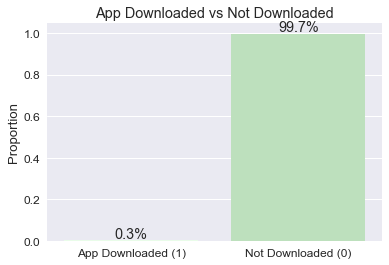

In [43]:
sns.set(font_scale=1.2)
mean = (train.is_attributed.values == 1).mean()
print(mean)
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean],palette=sns.light_palette("green"))
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

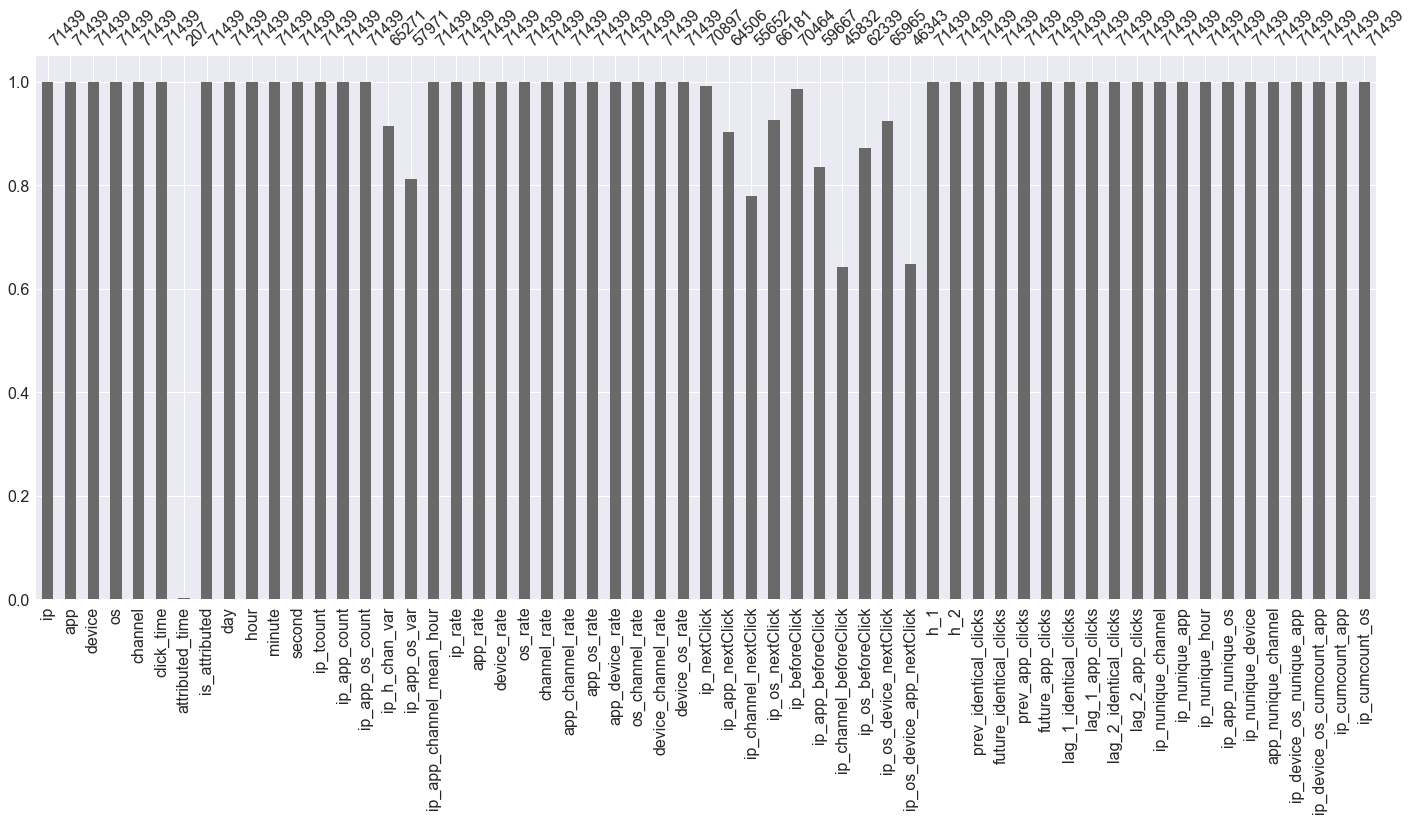

In [44]:
msno.bar(train.sample(71439))

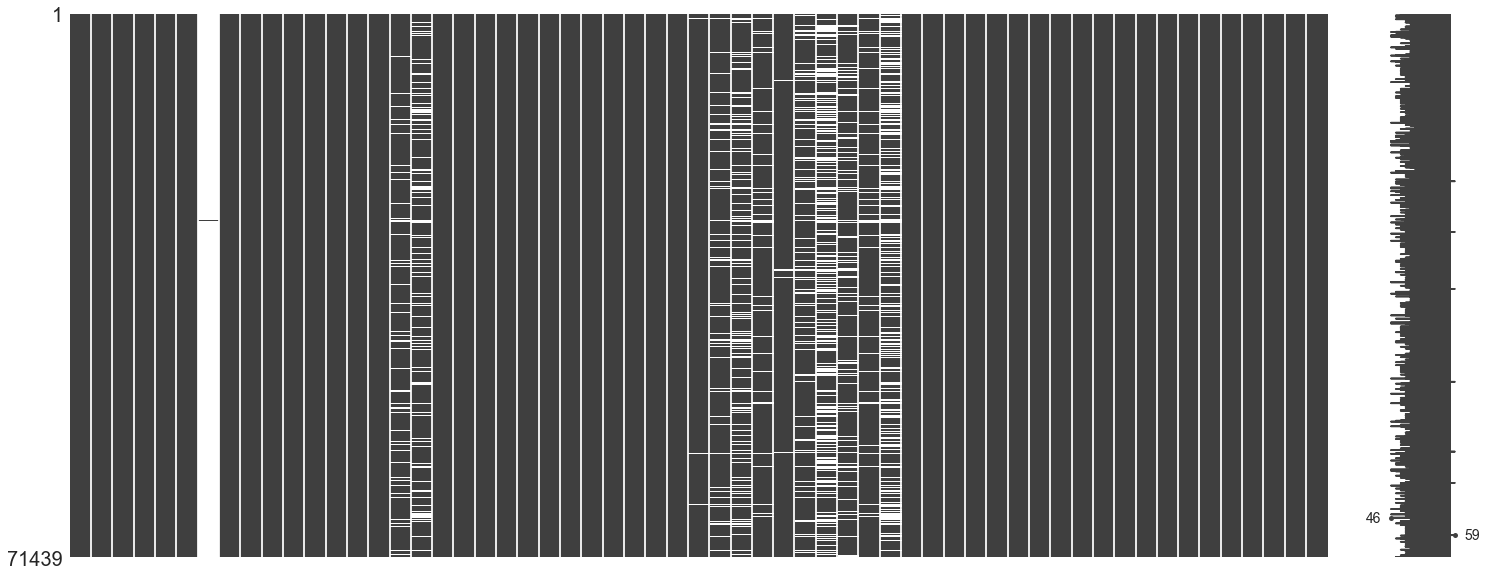

In [45]:
import missingno as msno
%matplotlib inline
msno.matrix(train.sample(71439))

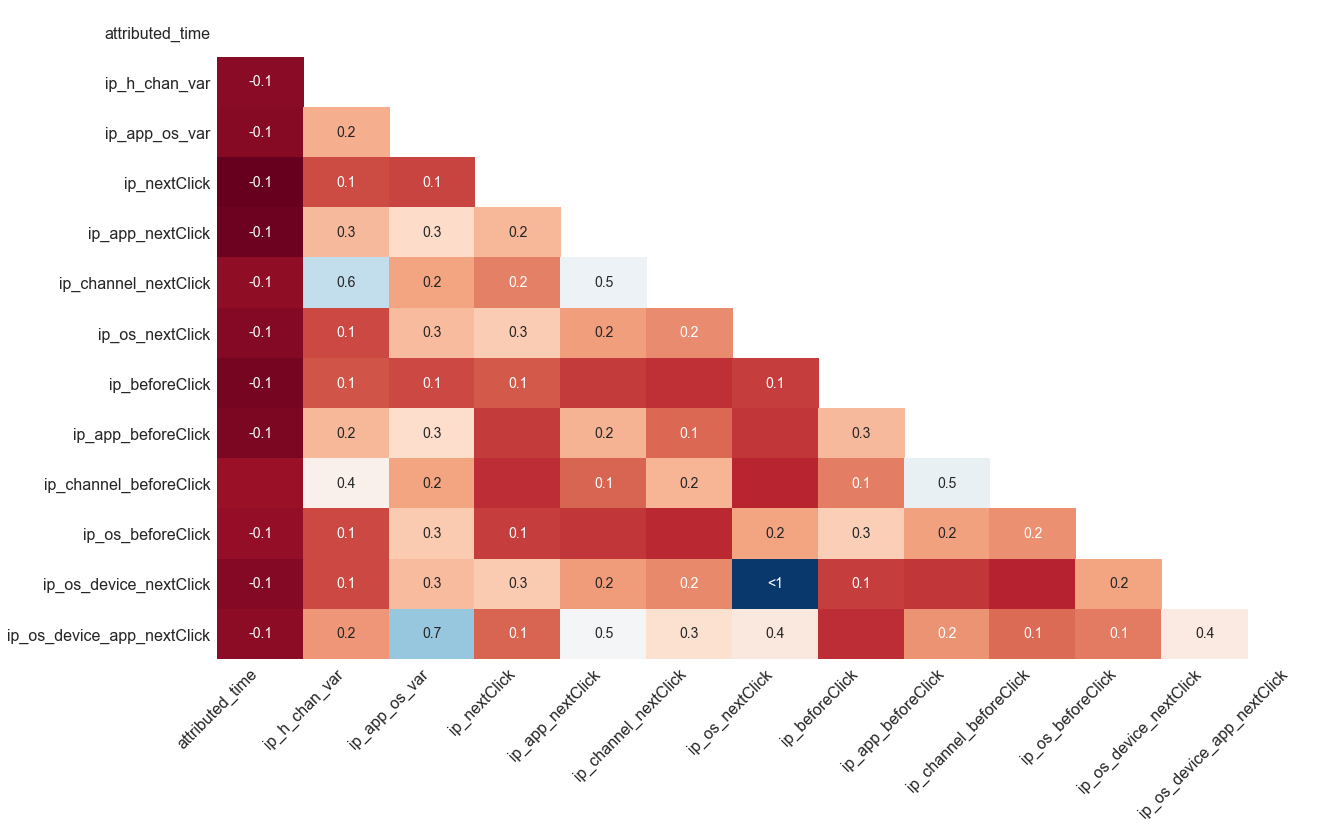

In [46]:
msno.heatmap(train)

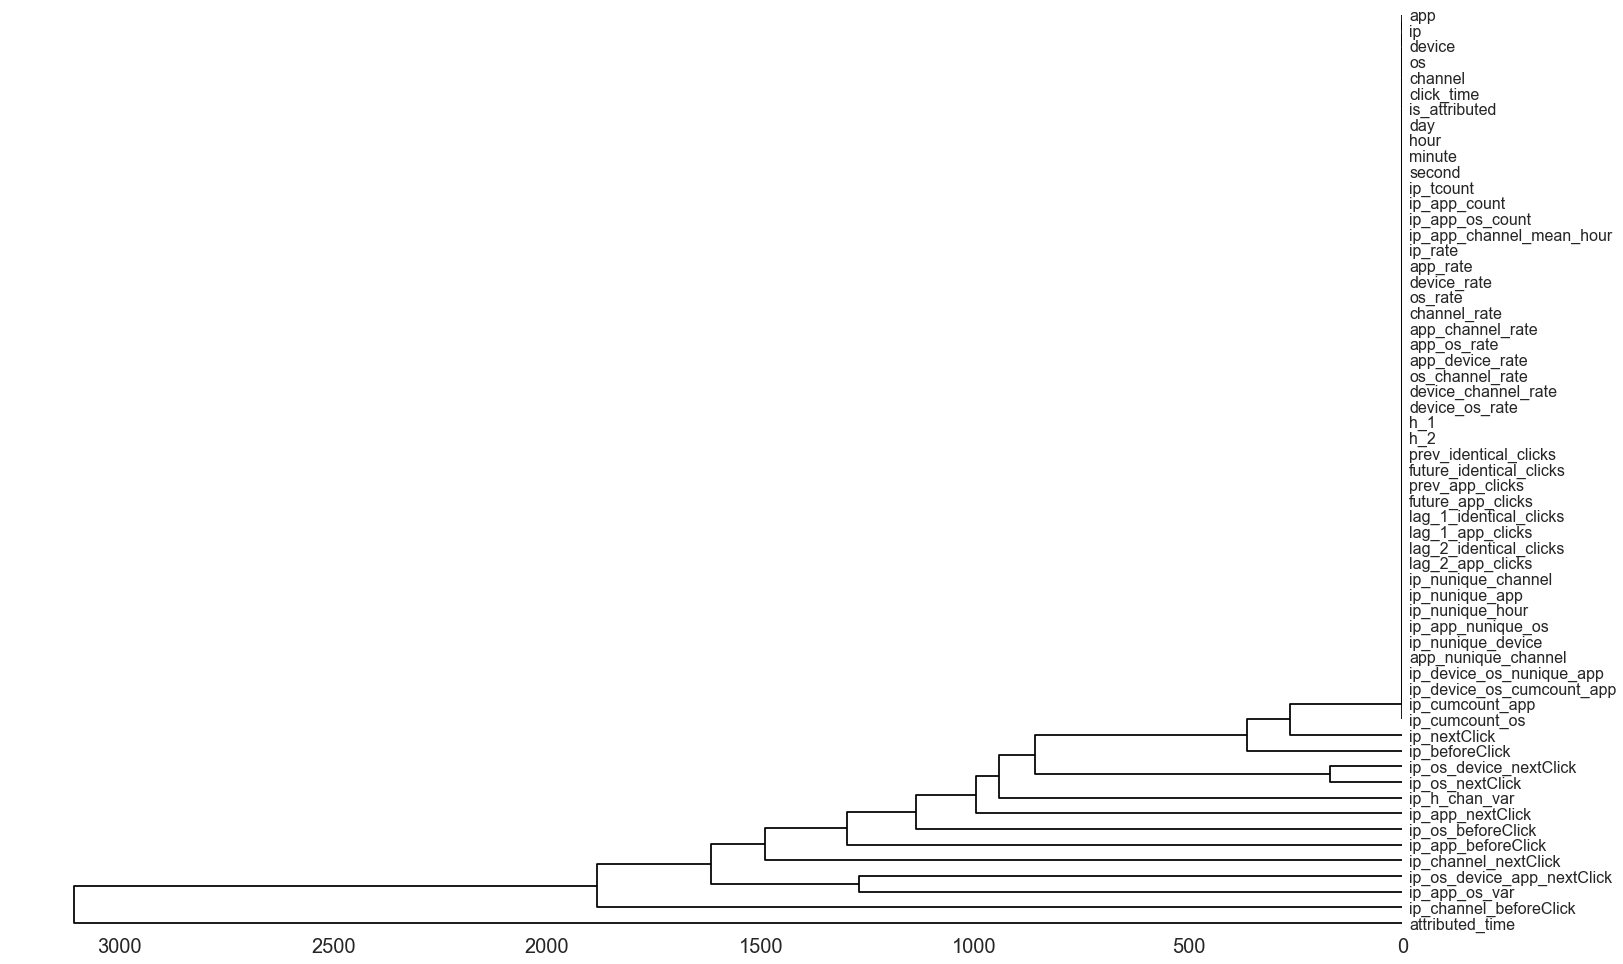

In [47]:
msno.dendrogram(train)

3.Data downsampling

In [48]:
ratio = 10
pos_df = train[train['is_attributed']==1]
neg_df = train[train['is_attributed']==0]
reduced_neg_df = neg_df.sample(ratio*len(pos_df), random_state=100)
down_train = pd.concat([pos_df]+[reduced_neg_df], ignore_index=True)

0.09090909090909091


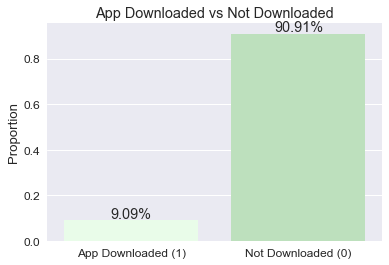

In [50]:
sns.set(font_scale=1.2)
mean = (down_train.is_attributed.values == 1).mean()
print(mean)
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean],palette=sns.light_palette("green"))
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

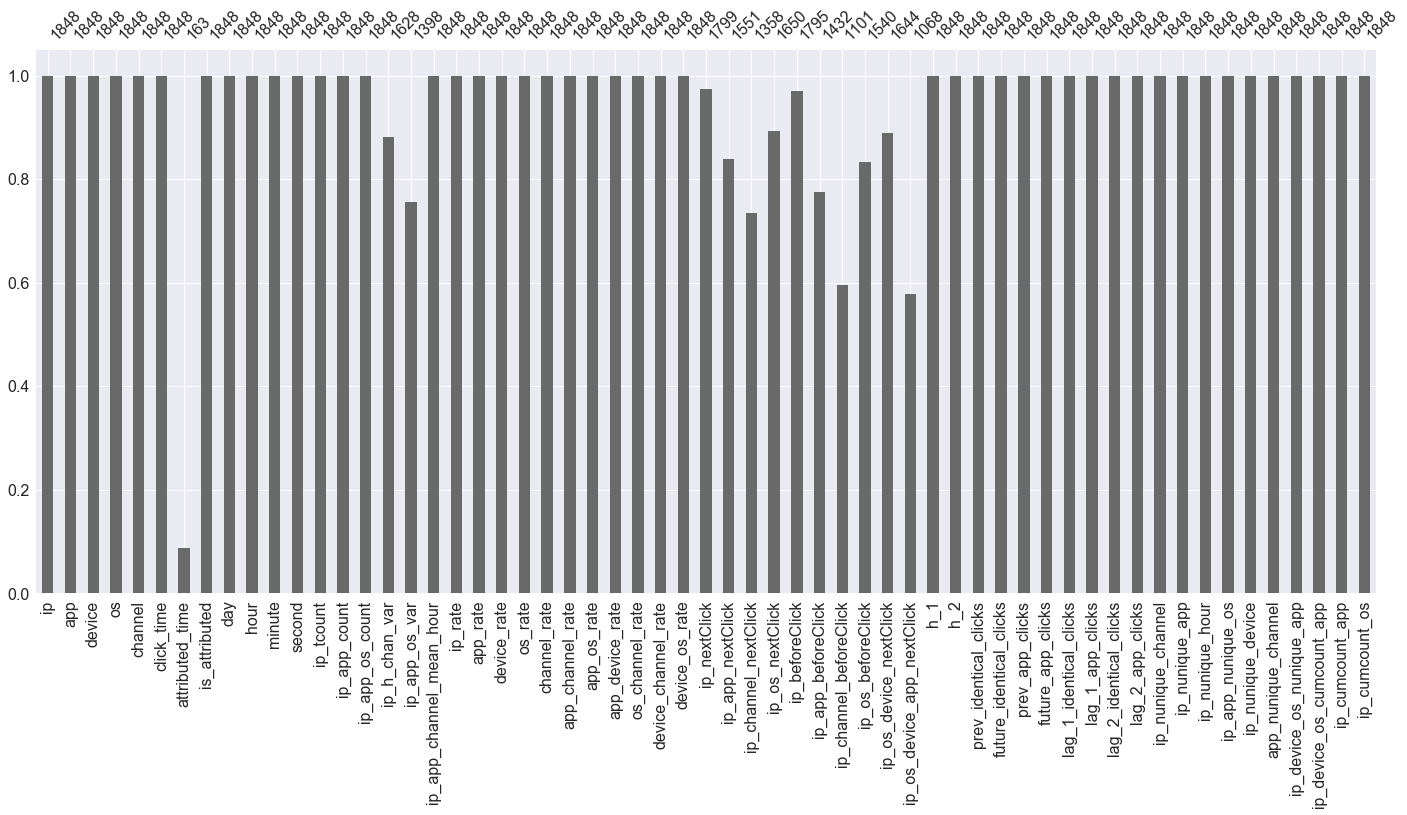

In [51]:
msno.bar(down_train.sample(1848))

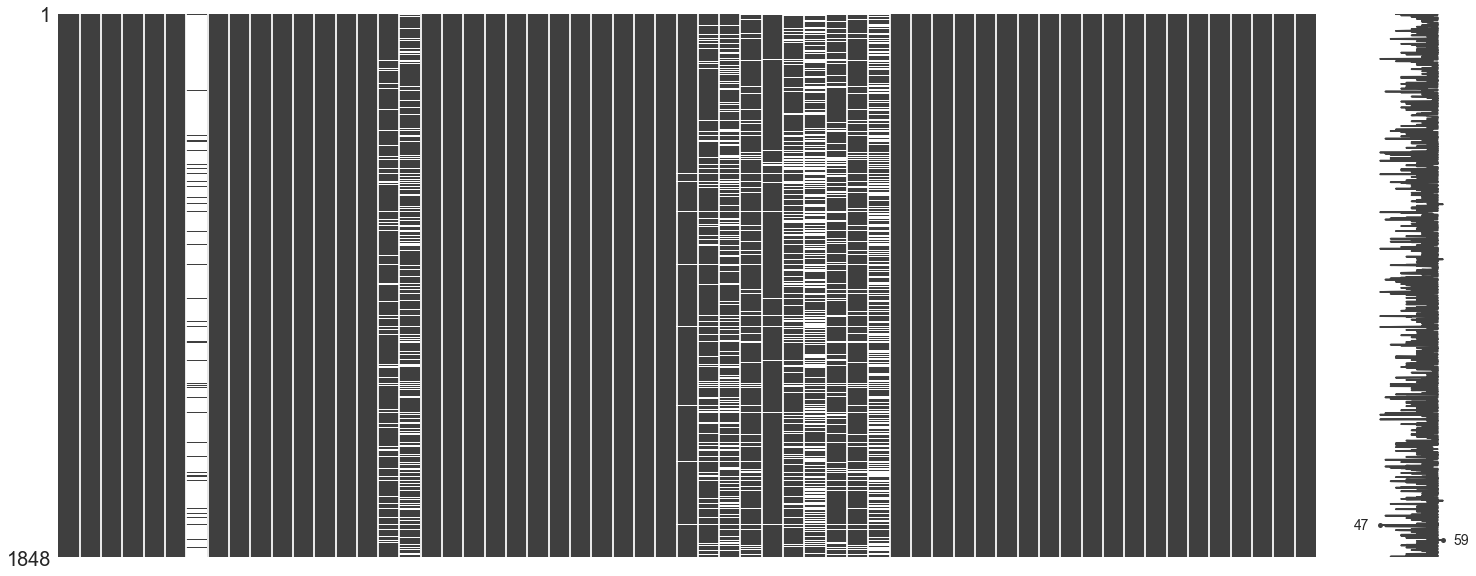

In [52]:
import missingno as msno
%matplotlib inline
msno.matrix(down_train.sample(1848))

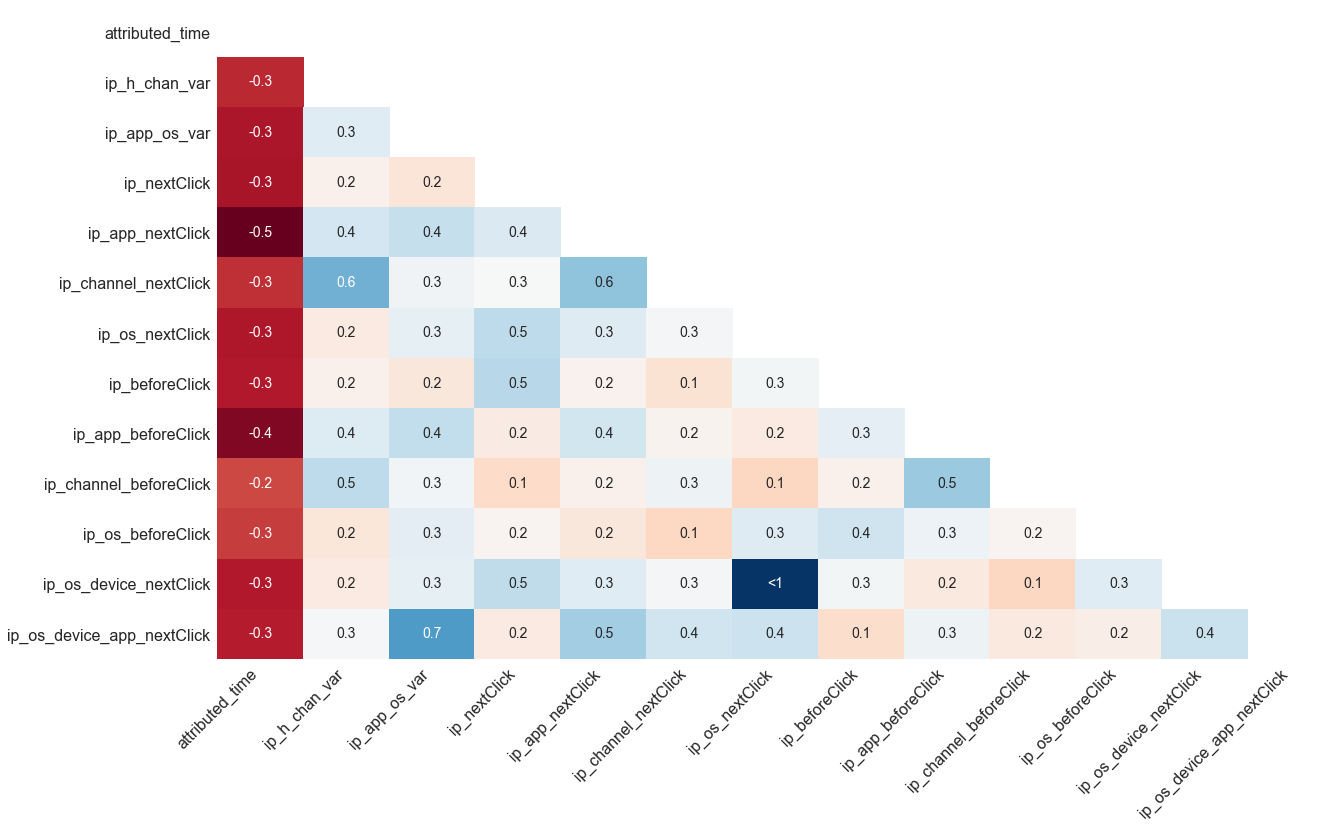

In [53]:
msno.heatmap(down_train)

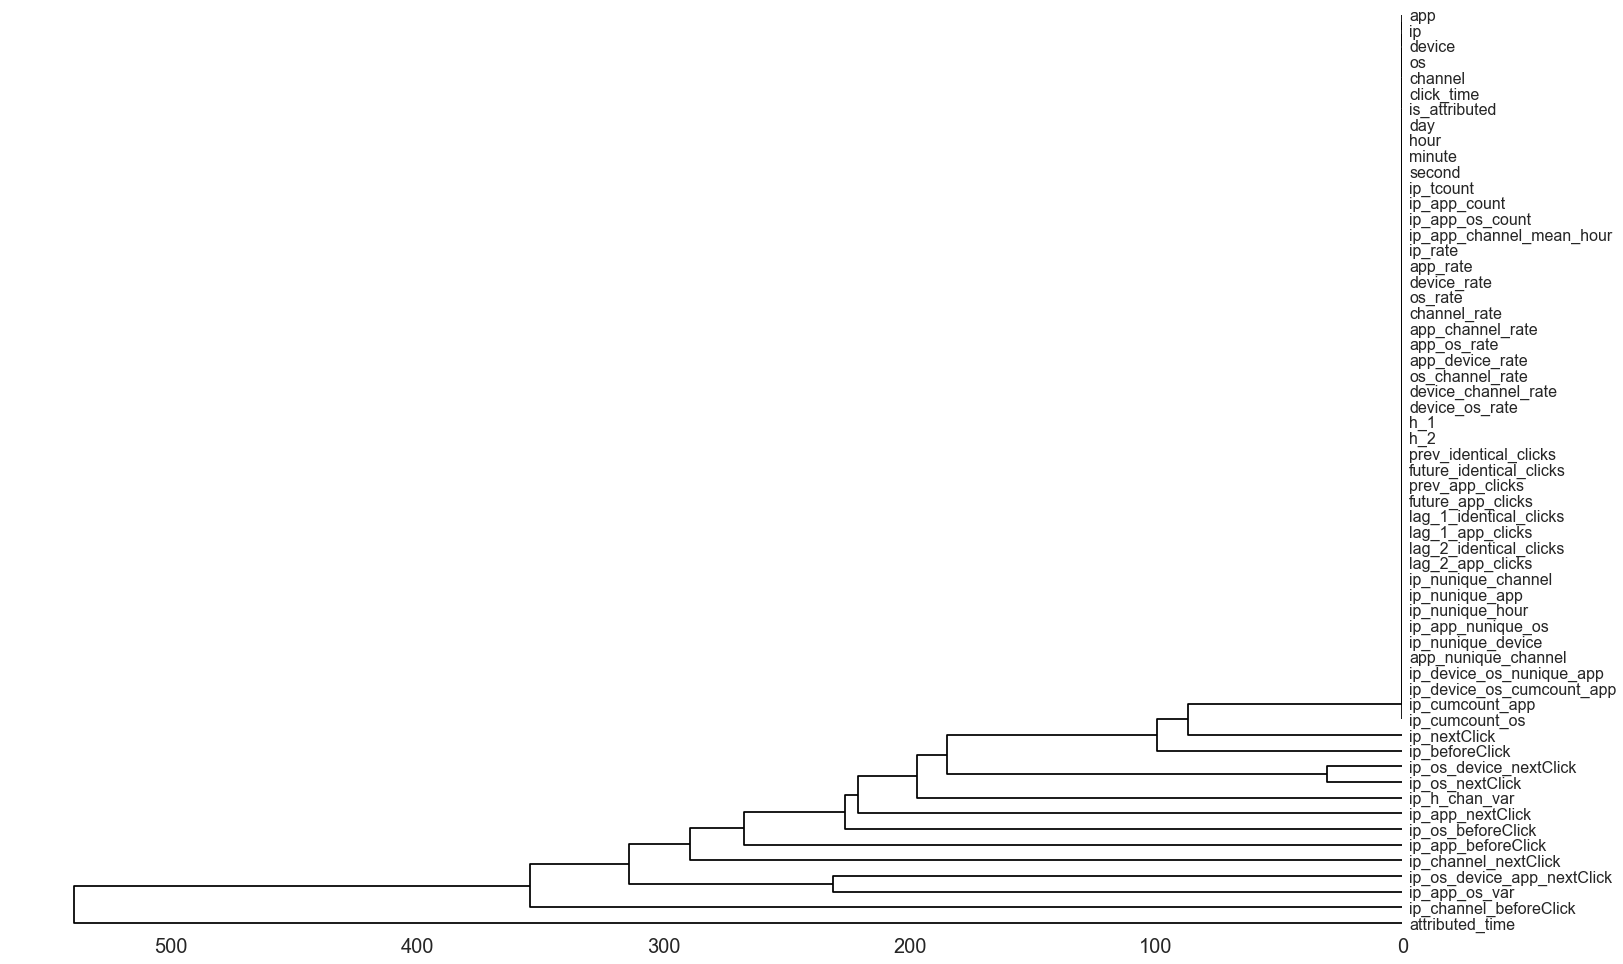

In [54]:
msno.dendrogram(down_train)

4.数据预处理

In [55]:
down_train=down_train.fillna(value=0)

In [56]:
from sklearn import preprocessing

In [57]:
col_names=train.columns.tolist()
print(col_names)

['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'is_attributed', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_beforeClick', 'ip_app_beforeClick', 'ip_channel_beforeClick', 'ip_os_beforeClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'h_1', 'h_2', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'lag_1_identical_clicks', 'lag_1_app_clicks', 'lag_2_identical_clicks', 'lag_2_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os

In [58]:
col_names_new=['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [59]:
minmax_scale = preprocessing.MinMaxScaler().fit(down_train[col_names_new])
down_minmax = minmax_scale.transform(down_train[col_names_new])

In [60]:
train=train.fillna(value=0)

In [61]:
minmax_scale = preprocessing.MinMaxScaler().fit(train[col_names_new])
train_minmax = minmax_scale.transform(train[col_names_new])

In [1]:
from pandas import DataFrame

In [62]:
train_minmax_1= DataFrame(train_minmax, columns=col_names_new)

NameError: name 'DataFrame' is not defined

## Feature importance selection

In [2]:
from pandas import DataFrame

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
down_minmax_1= DataFrame(down_minmax, columns=col_names_new)
down_minmax_1.head()

#### 1. Filter

In [ ]:
var=down_minmax_1.var()

In [ ]:
var

In [ ]:
pandas_profiling.ProfileReport(down_minmax_1)

In [ ]:
import gc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import GridSpec

In [ ]:
var.sort_values().plot(kind='barh', color='#a675a1')
plt.title('Feature Variance Ranking Barplot');
plt.ylabel('Variance of Features');

In [ ]:
var.sort_values()

In [ ]:
var=train_minmax_1.var()

In [ ]:
var.sort_values().plot(kind='barh', color='#a675a1')
plt.title('Feature Variance Ranking Barplot');
plt.ylabel('Variance of Features');

2.Chi-square test

In [ ]:
down_minmax_1.head()

In [ ]:
col_names_1=['ip', 'app', 'device', 'os', 'channel', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [ ]:
down_minmax_2=down_minmax_1[col_names_1]

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Perform feature selection
selector = SelectKBest(chi2, k=10)
selector.fit(down_minmax_2, y_train)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.title('Feature Variance Ranking Barplot');
plt.ylabel('Variance of Features');
plt.barh(range(len(down_minmax_2.columns)), scores, color='#a675a1')
plt.yticks(range(len(down_minmax_2.columns)), down_minmax_2.columns)
plt.show()

#### 3. Embeded



In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=47,
                           n_informative=47,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import xgboost as xgb

# Split into X and y
y = train['is_attributed']
X = train.drop('is_attributed', axis=1).select_dtypes(include=[np.number])

# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
# Fit the models
clf_xgBoost.fit(X, y)


In [ ]:
from sklearn import preprocessing

# Get xgBoost importances
importance_dict = {}
for import_type in ['weight', 'gain', 'cover']:
    importance_dict['xgBoost-'+import_type] = clf_xgBoost.get_booster().get_score(importance_type=import_type)
    
# MinMax scale all importances
importance_df = pd.DataFrame(importance_dict).fillna(0)
importance_df = pd.DataFrame(
    #preprocessing.MinMaxScaler().fit_transform(importance_df),
    columns=importance_df.columns,
    index=importance_df.index
)

# Create mean column
importance_df['mean'] = importance_df.mean(axis=1)

# Plot the feature importances
importance_df.sort_values('mean').plot(kind='bar', figsize=(20, 7))